<a href="https://colab.research.google.com/github/slai2021/Data_science/blob/main/Lai_Sta_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [3]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [4]:
def GPU(data): #fast chip google is giving us, plot command shows us the images, google slide data , load images then apply transform to data
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();
#alex net is the network that takes an image and produce a feature vector, a fingerprint of what the image is 

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [1]:
url = "https://docs.google.com/presentation/d/1Uqn7h4g7urIvTYyfMoJE9ymILDoU3rzaS_7b6p0ZE9g/edit#slide=id.g1a19eac416e_0_1004"
#takes us to the slide of our data

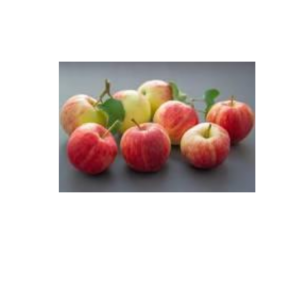

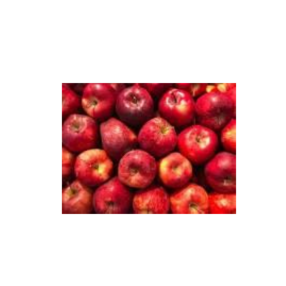

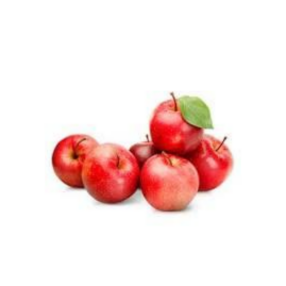

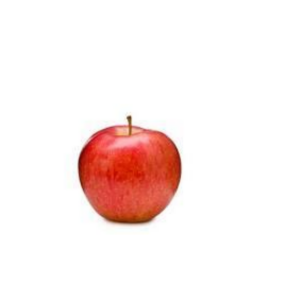

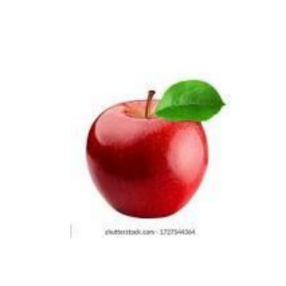

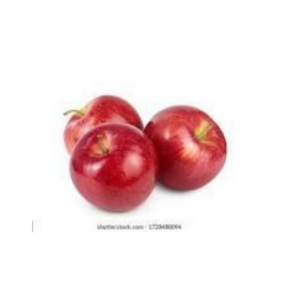

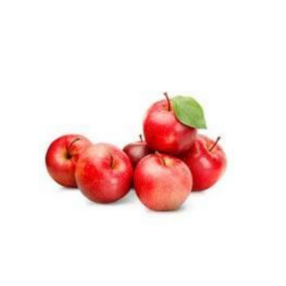

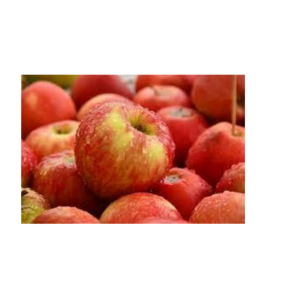

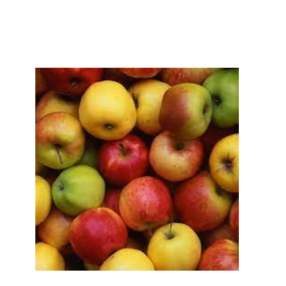

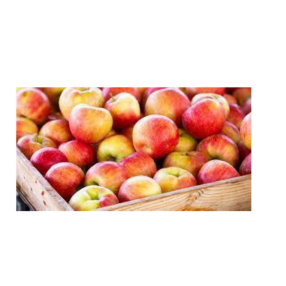

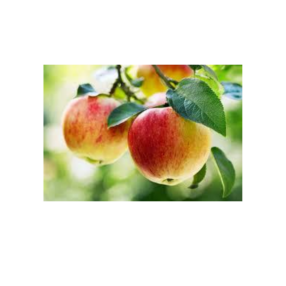

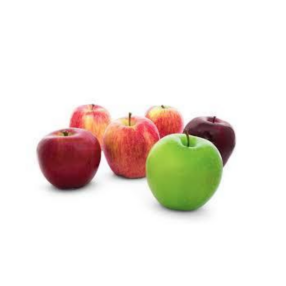

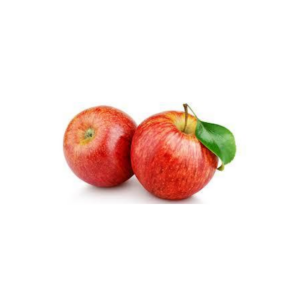

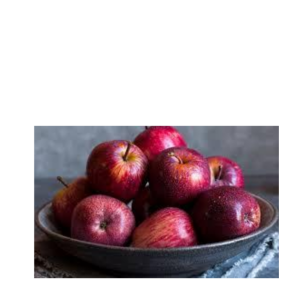

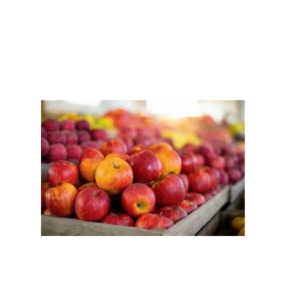

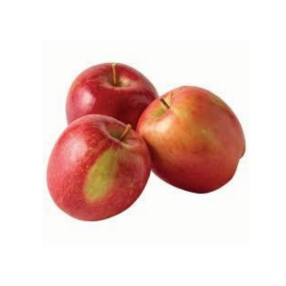

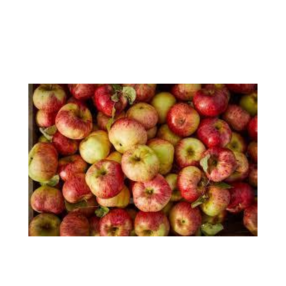

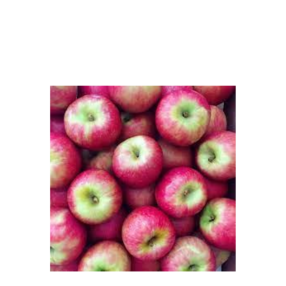

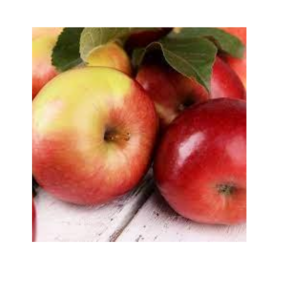

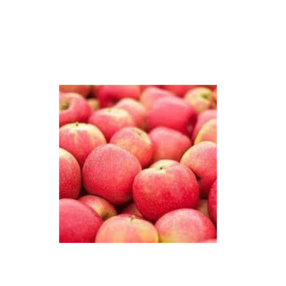

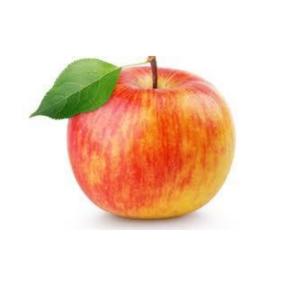

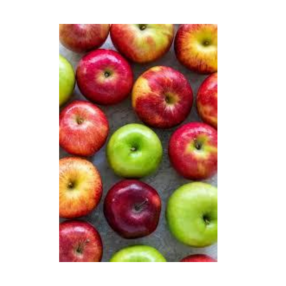

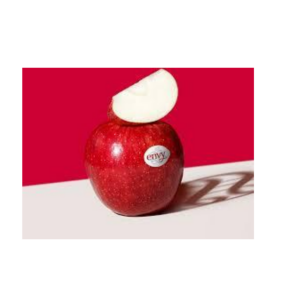

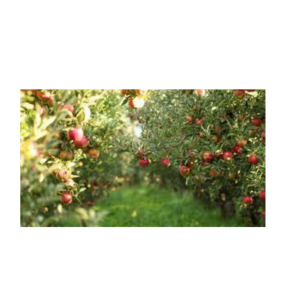

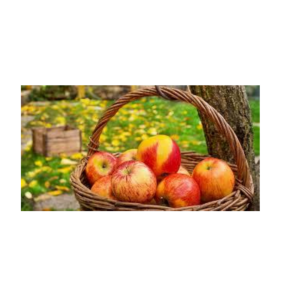

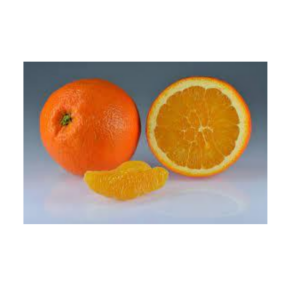

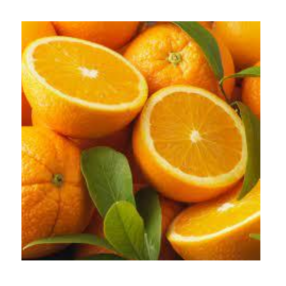

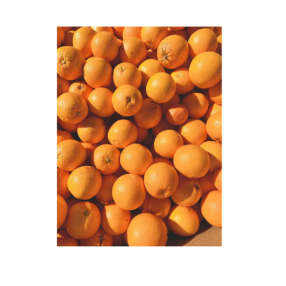

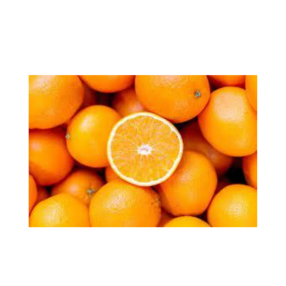

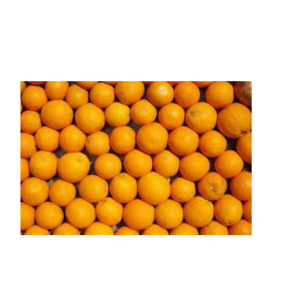

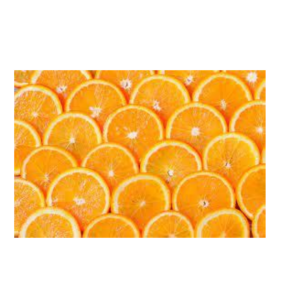

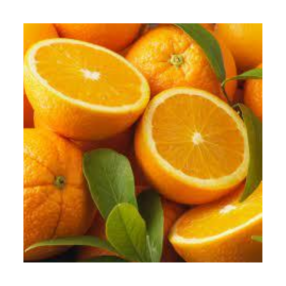

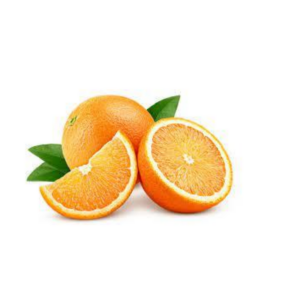

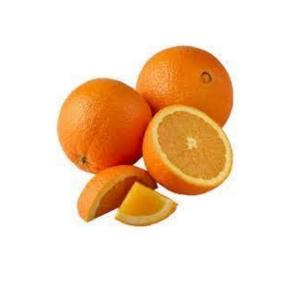

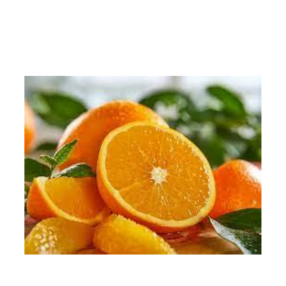

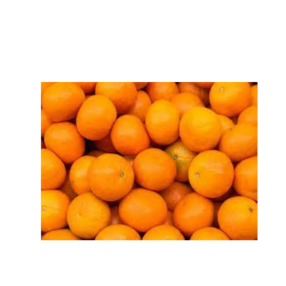

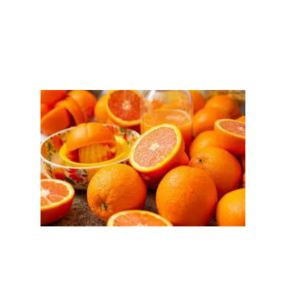

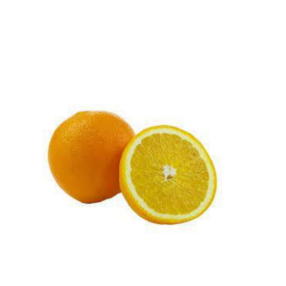

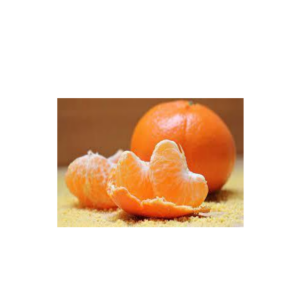

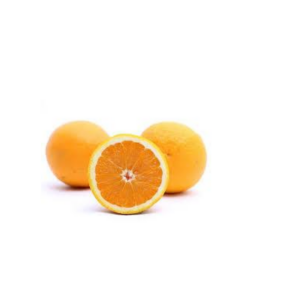

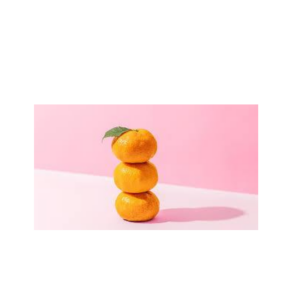

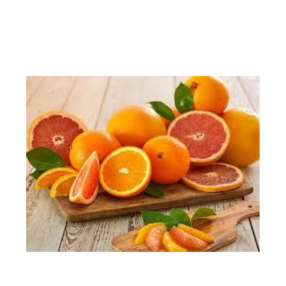

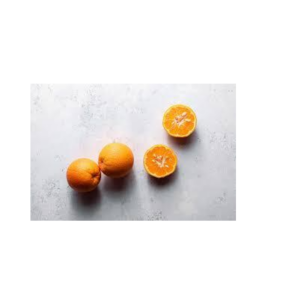

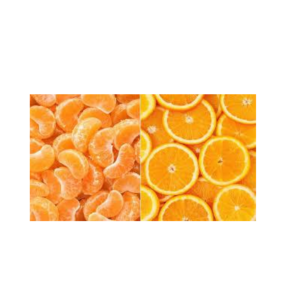

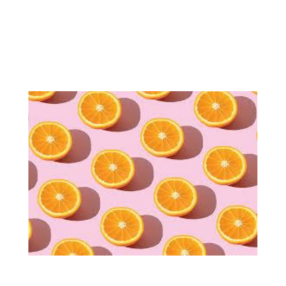

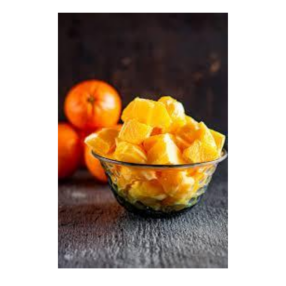

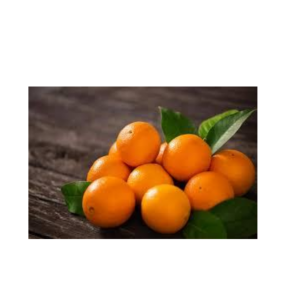

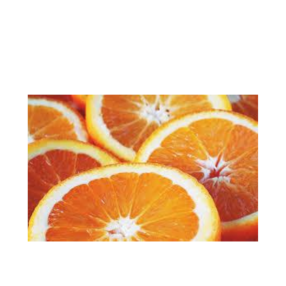

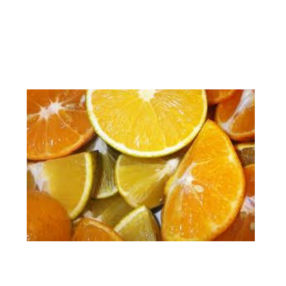

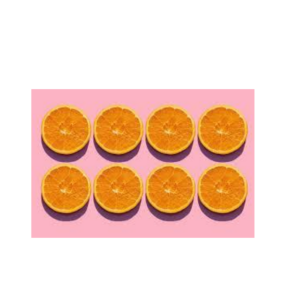

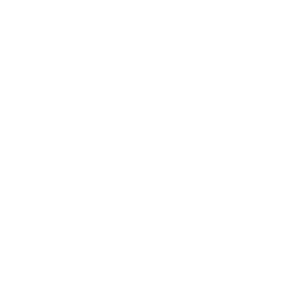

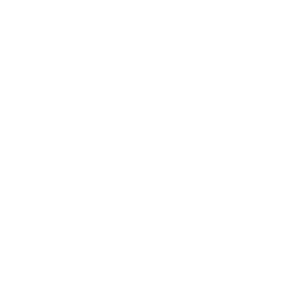

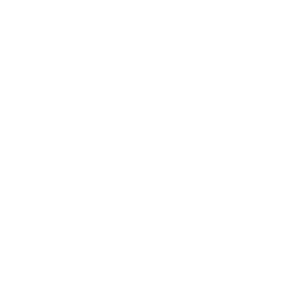

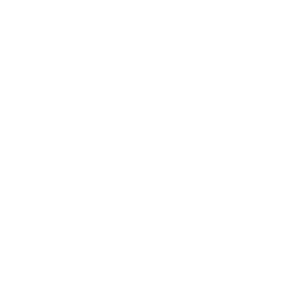

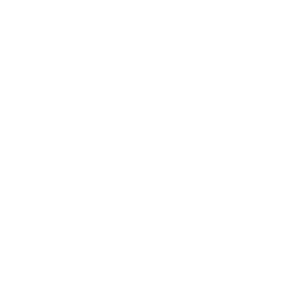

In [6]:
images = [] #25 images of apples, 25 images of oranges 

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [7]:
images.shape #array of sizes 

torch.Size([55, 3, 224, 224])

In [8]:
model(images) #tensor for images 

tensor([[-1.3321, -0.4091, -5.7180,  ...,  1.0015,  6.4580,  1.1831],
        [-3.3334, -1.2030, -4.9758,  ..., -1.1330,  3.0019,  2.8748],
        [-0.9863,  1.8142, -5.9948,  ...,  1.6177,  7.3884,  0.9774],
        ...,
        [ 0.3832,  0.4531, -2.1673,  ..., -2.5195,  0.1401,  0.9634],
        [ 0.3832,  0.4531, -2.1673,  ..., -2.5195,  0.1401,  0.9634],
        [ 0.3832,  0.4531, -2.1673,  ..., -2.5195,  0.1401,  0.9634]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [9]:
y = model(images)

In [10]:
y.shape #range from 55-1000

torch.Size([55, 1000])

In [11]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [12]:
for i in list(guesses): #using image net to collect images from lots of categories
    print(labels[i])

bell pepper
matchstick
pomegranate
punching bag, punch bag, punching ball, punchball
bell pepper
pomegranate
pomegranate
matchstick
crate
crate
screen, CRT screen
hair slide
strawberry
pomegranate
strawberry
buckeye, horse chestnut, conker
abacus
ping-pong ball
Granny Smith
matchstick
Granny Smith
Granny Smith
can opener, tin opener
hair slide
pineapple, ananas
orange
pill bottle
ping-pong ball
lemon
abacus
honeycomb
pill bottle
orange
orange
orange
ping-pong ball
pill bottle
lemon
pill bottle
corn
pill bottle
butternut squash
ping-pong ball
honeycomb
pill bottle
orange
ping-pong ball
orange
honeycomb
pill bottle
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife


In [13]:
Y = np.zeros(50,) #answer key
Y[25:] = 1

In [14]:
Y #answer key for the quiz 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [15]:
X = y.detach().cpu().numpy() 

In [16]:
X.shape

(55, 1000)

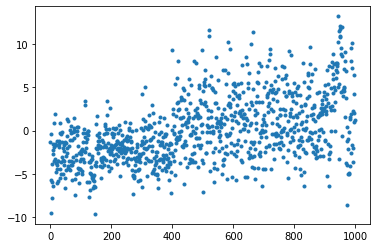

In [17]:
plt.plot(X[0],'.')  #output for each of the 1000 categories, the number 1 dot of granny smith, 

In [18]:
X[0] #taking the lists of # from the outputs 

array([-1.33205438e+00, -4.09059107e-01, -5.71804905e+00, -9.49400902e+00,
       -5.88157558e+00, -3.89165926e+00, -7.74907398e+00, -2.18566251e+00,
       -1.52197695e+00, -6.41727114e+00, -2.64156771e+00, -1.92236614e+00,
        8.58264089e-01, -3.49270487e+00, -3.30149508e+00, -1.54574752e+00,
        1.95743895e+00, -1.60594535e+00, -4.82614708e+00, -3.72794867e+00,
       -4.40534973e+00, -4.00230885e+00, -6.03237820e+00, -1.21001565e+00,
       -5.83109379e+00, -3.55637050e+00, -3.54312134e+00, -1.86711037e+00,
       -1.57617676e+00, -1.25014544e+00, -5.41985559e+00,  9.03692901e-01,
       -2.72234082e-01, -4.43641567e+00, -4.96466351e+00, -3.57330966e+00,
       -4.42583650e-01, -1.30226862e+00, -2.98164058e+00, -1.46578133e-01,
       -1.95006847e+00, -3.39788604e+00, -5.04800129e+00, -2.38558412e+00,
       -3.52283907e+00, -4.01874685e+00, -1.68603754e+00, -1.30221486e+00,
       -6.58580112e+00, -5.44271660e+00, -2.90759230e+00, -1.44689465e+00,
       -4.53169107e+00, -

In [19]:
np.argmax(X[0]) #value of 0

945

In [20]:
labels[948] #granny smith is the chosen label 

'Granny Smith'

In [21]:
top_ten = np.argsort(X[0])[::-1][0:10] #sort all of the values from the feature vector,want to look at the top 10

In [ ]:
for i in top_ten: #top 10 guesses 
    print(labels[i])

In [22]:
labels #labels for the top 10

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([  6.,  57., 185., 255., 215., 121.,  88.,  46.,  18.,   9.]),
 array([-9.603994  , -7.3240395 , -5.0440845 , -2.7641299 , -0.48417512,
         1.7957797 ,  4.0757346 ,  6.3556895 ,  8.635644  , 10.915599  ,
        13.195554  ], dtype=float32),
 <a list of 10 Patch objects>)

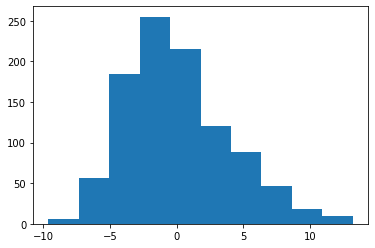

In [23]:
plt.hist(X[0]) #histogram table of the array 

In [24]:
X = GPU_data(X) #data for x and y
Y = GPU_data(Y)

In [25]:
def softmax(x): #softmax for s1
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [26]:
def cross_entropy(outputs, labels):            #outputs and ranges for 0
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [27]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [28]:
def Truncated_Normal(size): 

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [29]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [30]:
X.shape #size

torch.Size([55, 1000])

In [31]:
def get_batch(mode): #mode for train, test for X, Y
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [32]:
def model(x,w):

    return x@w[0]

In [33]:
def make_plots(): #test for the model of x, w, y
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [ ]:
wb.init(project="Linear_Model_Photo_1"); #make a new linear model to tell the images apart, model of train and logging the losses 
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

https://tensorspace.org/